In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Define the path to the data file
history_path = os.path.expanduser('~/byuive/MESA/MESA TA/bayu/1.85/1.85_(0.08_0.016)/logs/Lambda dredge_up 0.85_8_16.xlsx')

# Read the Excel file
try:
    history_data = pd.read_excel(history_path, header=0)
    print("Preview of the data:")
    print(history_data.head())
except Exception as e:
    print(f"Error reading the Excel file: {e}")
    exit()

# Clean column names
history_data.columns = history_data.columns.str.strip()

# Extract columns for plotting
try:
    Teff = history_data['co_core_mass']
    L = history_data['lambda_DUP']
except KeyError as e:
    print(f"Column not found: {e}")
    print("Available columns:", history_data.columns)
    exit()

# Optional smoothing
Teff_smooth = gaussian_filter1d(Teff, sigma=1)
L_smooth = gaussian_filter1d(L, sigma=1)

# Set up the figure
fig, ax_hr = plt.subplots(figsize=(10, 6))

# HR Diagram
ax_hr.plot(Teff_smooth, L_smooth, color='red', label='1.85 (0.008/0.016)')
ax_hr.set_xlabel(r'log (T$_\mathrm{eff}$/K)', fontsize=12)
ax_hr.set_ylabel(r'log (L/L$_\odot$)', fontsize=12)
ax_hr.set_title('HR Diagram', fontsize=16)
ax_hr.invert_xaxis()  # HR diagram convention: invert x-axis for Teff
ax_hr.legend()


# Adjust layout for clarity
plt.tight_layout()

# Save the figure
output_path = os.path.expanduser('~/byuive/MESA/MESA TA/bayu.png')
plt.savefig(output_path, dpi=300)

# Show the plot
plt.show()


Error reading the Excel file: [Errno 2] No such file or directory: '/home/bayuhdn26/byuive/MESA/MESA TA/bayu/1.85/1.85_(0.08_0.016)/logs/Lambda dredge_up 0.85_8_16.xlsx'


NameError: name 'history_data' is not defined

Preview of the data:
   log_Teff     log_L
0  3.700427  0.760016
1  3.700392  0.759870
2  3.700392  0.759870
3  3.700392  0.759869
4  3.700392  0.759868
Cleaned data preview:
   log_Teff     log_L
0  3.700427  0.760016
1  3.700392  0.759870
2  3.700392  0.759870
3  3.700392  0.759869
4  3.700392  0.759868


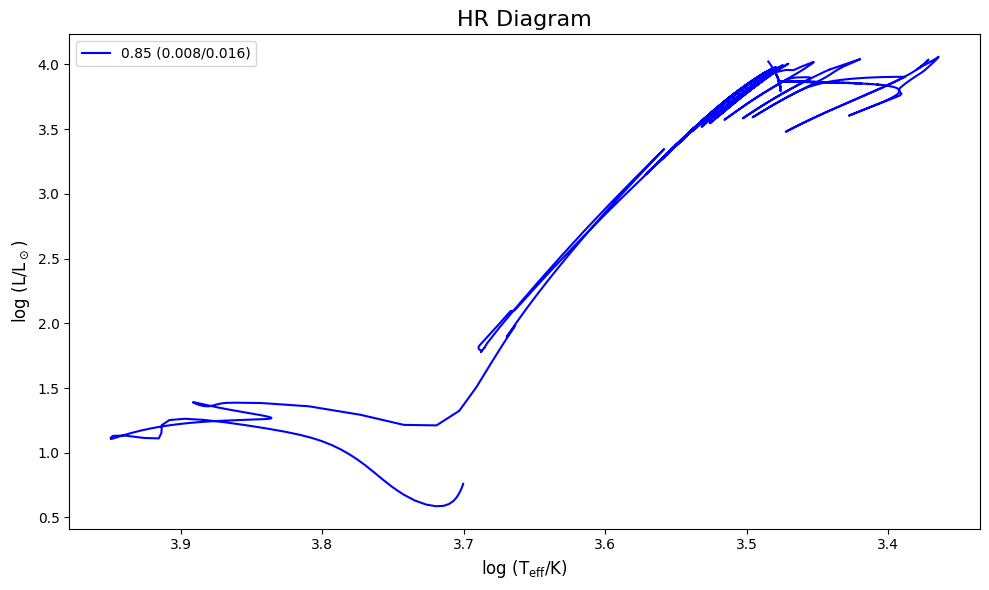

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Define the path to the data file
history_path = os.path.expanduser('~/byuive/MESA/MESA TA/bayu/1.85/1.85_(0.016_0.032)/logs/Full_data_of_1.85(0.16_0.32).ods')

# Read the Excel file
try:
    history_data = pd.read_excel(history_path, header=0)
    print("Preview of the data:")
    print(history_data.head())
except Exception as e:
    print(f"Error reading the Excel file: {e}")
    exit()

# Clean column names
history_data.columns = history_data.columns.str.strip()

# Convert columns to numeric and handle invalid data
try:
    history_data['log_Teff'] = pd.to_numeric(history_data['log_Teff'], errors='coerce')
    history_data['log_L'] = pd.to_numeric(history_data['log_L'], errors='coerce')
    history_data = history_data.dropna(subset=['log_Teff', 'log_L'])  # Drop rows with NaN
    print("Cleaned data preview:")
    print(history_data[['log_Teff', 'log_L']].head())
except KeyError as e:
    print(f"Column not found: {e}")
    print("Available columns:", history_data.columns)
    exit()

# Extract cleaned columns
Teff = history_data['log_Teff']
L = history_data['log_L']

# Optional smoothing
Teff_smooth = gaussian_filter1d(Teff, sigma=1)
L_smooth = gaussian_filter1d(L, sigma=1)

# Set up the figure
fig, ax_hr = plt.subplots(figsize=(10, 6))

# HR Diagram
ax_hr.plot(Teff_smooth, L_smooth, color='blue', label='0.85 (0.008/0.016)')
ax_hr.set_xlabel(r'log (T$_\mathrm{eff}$/K)', fontsize=12)
ax_hr.set_ylabel(r'log (L/L$_\odot$)', fontsize=12)
ax_hr.set_title('HR Diagram', fontsize=16)
ax_hr.invert_xaxis()  # HR diagram convention: invert x-axis for Teff
ax_hr.legend()

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_6641/1333956395.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, skiprows=5, delim_whitespace=True, header=0)
/tmp/ipykernel_6641/1333956395.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, skiprows=5, delim_whitespace=True, header=0)
/tmp/ipykernel_6641/1333956395.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, skiprows=5, delim_whitespace=True, header=0)
/tmp/ipykernel_6641/1333956395.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, skiprows=5, delim

Plot saved as Dredge-up_2-1_Adjusted.png


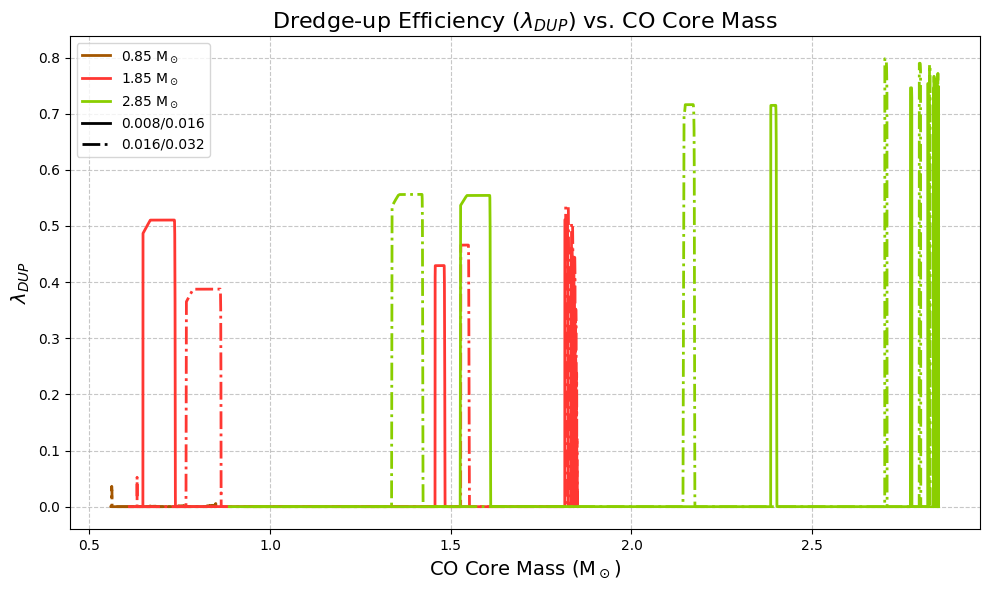

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.lines import Line2D

# Function to process and clean a dataset
def process_data(file_path):
    try:
        # Read the file, skipping the first 5 rows
        data = pd.read_csv(file_path, skiprows=5, delim_whitespace=True, header=0)
        data.columns = data.columns.str.strip()  # Clean column names
        data['co_core_mass'] = pd.to_numeric(data['star_mass'], errors='coerce')
        data['lambda_DUP'] = pd.to_numeric(data['lambda_DUP'], errors='coerce')
        data = data.dropna(subset=['co_core_mass', 'lambda_DUP'])  # Drop rows with NaN values
        return data
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

# Paths to data files
data_paths = [
    '~/byuive/MESA/MESA TA/bayu/0.85/0.85_(0.08_0.016)/logs/LOGS_TPAGB/history.data',  # 0.85 Msun file 1
    '~/byuive/MESA/MESA TA/bayu/0.85/0.85_(0.016_0.032)/logs/LOGS_TPAGB/history.data',  # 0.85 Msun file 2
    '~/byuive/MESA/MESA TA/bayu/1.85/1.85_(0.08_0.016)/logs/LOGS_TPAGB/history.data',
    '~/byuive/MESA/MESA TA/bayu/1.85/1.85_(0.016_0.032)/logs/LOGS_TPAGB/history.data',
    '~/byuive/MESA/MESA TA/bayu/2.85/2.85_(0.08_0.016)/logs/LOGS_TPAGB/history.data',  # 2.85 Msun file
    '~/byuive/MESA/MESA TA/bayu/2.85/2.85_(0.016_0.032)/logs/LOGS_TPAGB/history.data',
]

# Define line styles, colors, and labels
line_styles = ['-', '-.', '-', '-.', '-', '-.']  # Solid and dashed-dot styles for overshooting
colors = ['#a35600', '#a35600', '#ff3732', '#ff3732', '#8ACE00', '#8ACE00']  # Valid color codes
labels = [
    '0.85 M$_\odot$ (0.008/0.016)', '0.85 M$_\odot$ (0.016/0.032)',
    '1.85 M$_\odot$ (0.008/0.016)', '1.85 M$_\odot$ (0.016/0.032)',
    '2.85 M$_\odot$ (0.008/0.016)', '2.85 M$_\odot$ (0.016/0.032)',
]

# Plot configuration
plt.figure(figsize=(10, 6))

# Loop through the datasets and plot each one
for i, path in enumerate(data_paths):
    try:
        # Process the file
        data = process_data(os.path.expanduser(path))
        if data is not None:
            # Extract relevant columns
            co_core_mass = data['co_core_mass']
            lambda_DUP = data['lambda_DUP']
            
            # Plot the data with specified styles
            plt.plot(
                co_core_mass, lambda_DUP,
                linestyle=line_styles[i % len(line_styles)],
                color=colors[i % len(colors)],
                linewidth=2,
                label=labels[i]  # Include labels for individual datasets
            )
    except FileNotFoundError:
        print(f"File not found: {path}")
    except KeyError as e:
        print(f"Missing expected column in {path}: {e}")

# Custom legends for grouped explanations
legend_colors = [
    Line2D([0], [0], color='#a35600', lw=2, label='0.85 M$_\odot$'),
    Line2D([0], [0], color='#ff3732', lw=2, label='1.85 M$_\odot$'),
    Line2D([0], [0], color='#8ACE00', lw=2, label='2.85 M$_\odot$'),
]
legend_styles = [
    Line2D([0], [0], color='black', linestyle='-', lw=2, label='0.008/0.016'),
    Line2D([0], [0], color='black', linestyle='-.', lw=2, label='0.016/0.032'),
]

# Combine legends
plt.legend(handles=legend_colors + legend_styles, fontsize=10, loc='best')

# Adding title, labels, and grid
plt.title('Dredge-up Efficiency ($\lambda_{DUP}$) vs. CO Core Mass', fontsize=16)
plt.xlabel('CO Core Mass (M$_\odot$)', fontsize=14)
plt.ylabel('$\lambda_{DUP}$', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Save the plot
output_path = 'Dredge-up_2-1_Adjusted.png'
plt.savefig(output_path, dpi=600, bbox_inches='tight')  # Save as a PNG file
print(f"Plot saved as {output_path}")

# Show the plot
plt.tight_layout()
plt.show()


Plot saved as Mass_Lifetime_Adjusted_Bulat_Segitiga_fixed.png


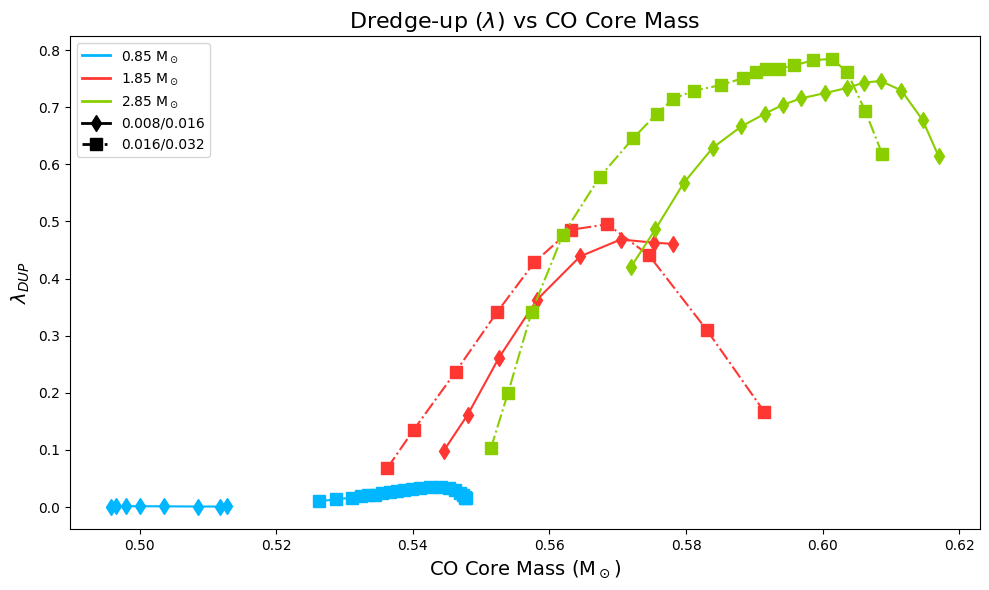

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from matplotlib.lines import Line2D

# Function to process and smooth a dataset
def process_data(file_path):
    try:
        data = pd.read_excel(file_path, header=0)
        data.columns = data.columns.str.strip()  # Clean column names
        data['CO_core_mass'] = pd.to_numeric(data['CO_core_mass'], errors='coerce')
        data['lambda_DUP'] = pd.to_numeric(data['lambda_DUP'], errors='coerce')
        data = data.dropna(subset=['CO_core_mass', 'lambda_DUP'])  # Drop rows with NaN
        return data
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

# Paths to data files
data_paths = [
    '~/byuive/MESA/MESA TA/bayu/lambda max/Lambda dredge_up max 0.85_08_16.ods',
    '~/byuive/MESA/MESA TA/bayu/lambda max/Lambda dredge up max 0.85_16_32.ods',
    '~/byuive/MESA/MESA TA/bayu/lambda max/Lambda dredge_up max 1.85_08_16.ods',
    '~/byuive/MESA/MESA TA/bayu/lambda max/Lambda dredge up max 1.85_16_32.ods',
    '~/byuive/MESA/MESA TA/bayu/lambda max/Lambda dredge_up max 2.85_08_16.ods',
    '~/byuive/MESA/MESA TA/bayu/lambda max/Lambda dredge up max 2.85_16_32.ods'
]

# Colors, markers, and labels for the plots
plot_colors = ['#00b7ff', '#00b7ff', '#ff3732', '#ff3732', '#8ACE00', '#8ACE00']
plot_markers = ['d', 's', 'd', 's','d', 's']  # "o" for 0.008/0.016, "^" for 0.016/0.032
plot_styles = ['-', '-.', '-', '-.', '-', '-.']  # Solid for 0.008/0.016, Dashed for 0.016/0.032
plot_labels = ['0.85 (0.08/0.016)', '0.85 (0.16/0.032)','1.85 (0.08/0.016)', '1.85 (0.16/0.032)', '2.85 (0.08/0.016)', '2.85 (0.16/0.032)']

# Prepare the figure
plt.figure(figsize=(10, 6))

# Process each dataset and plot it
for file_path, color, marker, style, label in zip(data_paths, plot_colors, plot_markers, plot_styles, plot_labels):
    file_path = os.path.expanduser(file_path)
    data = process_data(file_path)
    if data is not None:
        CO = gaussian_filter1d(data['CO_core_mass'], sigma=1)  # Smooth C/O Core Mass
        DUP = gaussian_filter1d(data['lambda_DUP'], sigma=1)  # Smooth Lambda Dredge-up
        plt.plot(CO, DUP, color=color, linestyle=style, marker=marker, markersize=8, label=label)  # Add plot

# Custom legends
legend_colors = [
   Line2D([0], [0], color='#00b7ff', lw=2, label='0.85 M$_\odot$'),
    Line2D([0], [0], color='#ff3732', lw=2, label='1.85 M$_\odot$'),
    Line2D([0], [0], color='#8ACE00', lw=2, label='2.85 M$_\odot$'),
]
legend_styles = [
    Line2D([0], [0], color='black', linestyle='-', lw=2, marker='d', markersize=8, label='0.008/0.016'),
    Line2D([0], [0], color='black', linestyle='-.', lw=2, marker='s', markersize=8, label='0.016/0.032'),
]

# Combine legends
plt.legend(handles=legend_colors + legend_styles, fontsize=10, loc='best')

# Adding title, labels, and grid
plt.title('Dredge-up ($\lambda_{}$) vs CO Core Mass', fontsize=16)
plt.xlabel('CO Core Mass (M$_\odot$)', fontsize=14)
plt.ylabel('$\lambda_{DUP}$', fontsize=14)
plt.grid(False)

# Save the plot
output_path = 'Mass_Lifetime_Adjusted_Bulat_Segitiga_fixed.png'
plt.savefig(output_path, dpi=600, bbox_inches='tight')  # Save as a PNG file
print(f"Plot saved as {output_path}")

# Show the plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_6995/984159844.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(history_path_1, delim_whitespace=True, skiprows=5)


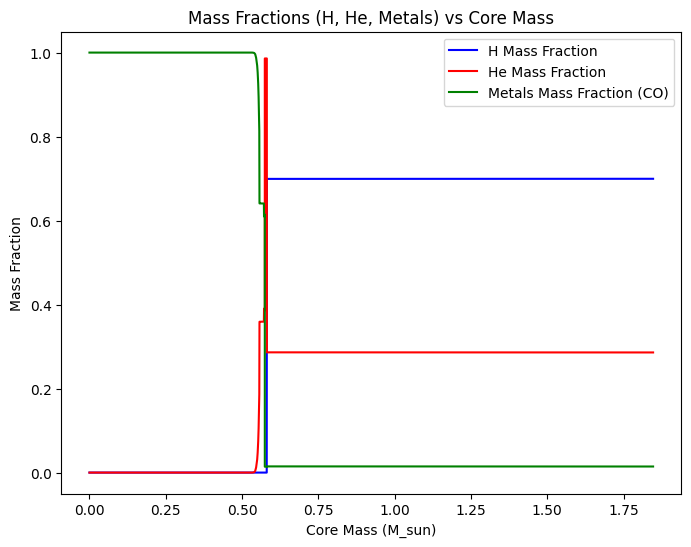

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to your MESA file (replace with actual path)
history_path_1 = '~/byuive/MESA/MESA TA/bayu/1.85/1.85_(0.08_0.016)/logs/LOGS_TPAGB/profile10.data'

# Reading the file
data = pd.read_csv(history_path_1, delim_whitespace=True, skiprows=5)

# Defining variables for plotting
core_mass = data['mass']  # Core mass
mass_fraction_1 = data['x_mass_fraction_H']  # Mass fraction of hydrogen
mass_fraction_2 = data['y_mass_fraction_He']  # Mass fraction of helium
mass_fraction_3 = data['z_mass_fraction_metals']  # Mass fraction of metals

# Creating the plot
plt.figure(figsize=(8, 6))

# Plotting each mass fraction with a different color and label
plt.plot(core_mass, mass_fraction_1, label='H Mass Fraction', color='blue')
plt.plot(core_mass, mass_fraction_2, label='He Mass Fraction', color='red')
plt.plot(core_mass, mass_fraction_3, label='Metals Mass Fraction (CO)', color='green')

# Adding title and axis labels
plt.title('Mass Fractions (H, He, Metals) vs Core Mass')
plt.xlabel('Core Mass (M_sun)')
plt.ylabel('Mass Fraction')

# Adding grid and legend
plt.grid(False)
plt.legend()

# Saving the plot
plt.savefig('mass_fractions_vs_core_mass_10.png', dpi=300)  # Save as a PNG file with 300 DPI

# Showing the plot
plt.show()


In [22]:
import imageio

# List of image file names in order
images = [
    'mass_fractions_vs_core_mass_1.png',
    'mass_fractions_vs_core_mass_2.png',
    'mass_fractions_vs_core_mass_3.png',
    'mass_fractions_vs_core_mass_4.png',
    'mass_fractions_vs_core_mass_5.png',
    'mass_fractions_vs_core_mass_6.png'
]

# Create a movie writer object with higher fps for a shorter video duration
with imageio.get_writer('0.85.mp4', fps=1) as writer:
    for image in images:
        img = imageio.imread(image)
        writer.append_data(img)

print('Faster movie created successfully!')


/tmp/ipykernel_4595/1376033879.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(image)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2400, 1800) to (2400, 1808) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[rawvideo @ 0x62bd500] Stream #0: not enough frames to estimate rate; consider increasing probesize


Faster movie created successfully!


Data columns: Index(['model_number', 'num_zones', 'star_age', 'log_dt', 'star_mass',
       'log_xmstar', 'log_abs_mdot', 'mass_conv_core', 'conv_mx1_top',
       'conv_mx1_bot', 'conv_mx2_top', 'conv_mx2_bot', 'mx1_top', 'mx1_bot',
       'mx2_top', 'mx2_bot', 'log_LH', 'log_LHe', 'log_LZ', 'log_Lnuc', 'pp',
       'cno', 'tri_alpha', 'epsnuc_M_1', 'epsnuc_M_2', 'epsnuc_M_3',
       'epsnuc_M_4', 'epsnuc_M_5', 'epsnuc_M_6', 'epsnuc_M_7', 'epsnuc_M_8',
       'he_core_mass', 'co_core_mass', 'one_core_mass', 'fe_core_mass',
       'neutron_rich_core_mass', 'log_Teff', 'log_L', 'log_R', 'log_g',
       'v_div_csound_surf', 'log_cntr_P', 'log_cntr_Rho', 'log_cntr_T',
       'center_mu', 'center_ye', 'center_abar', 'center_h1', 'center_he4',
       'center_c12', 'center_o16', 'surface_c12', 'surface_o16',
       'total_mass_h1', 'total_mass_he4', 'num_retries', 'num_iters',
       'alpha_mlt_max', 'alpha_mlt_surface', 'min_beta', 'varcontrol',
       'conv_env_bot', 'TP_count', 'PDCZ_overs

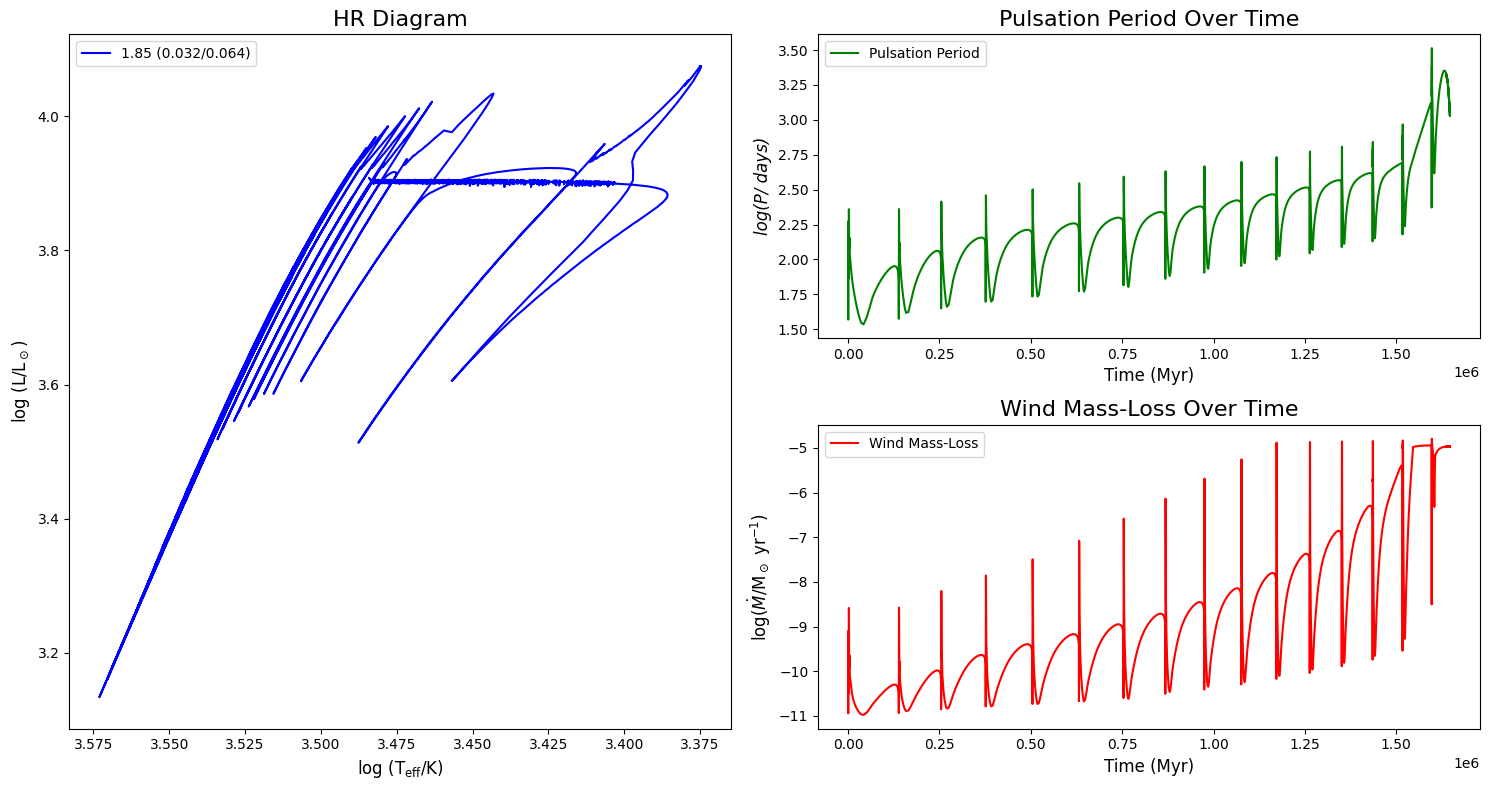

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Define the path to the data file
history_path = os.path.expanduser('~/byuive/MESA/MESA TA/bayu/1.85/1.85_(0.032_0.064)/logs/LOGS_TPAGB/history.data')

# Define the starting row for the data and the header row
data_start_row = 5

# Read the data file
history_data = pd.read_csv(history_path, skiprows=data_start_row, sep=r'\s+|,|;|\t', engine='python')

# Print the column names to ensure correct column selection
print("Data columns:", history_data.columns)

# Extract columns for plotting
Teff = history_data['log_Teff']
L = history_data['log_L']
time = history_data['star_age']  # Assuming 'star_age' is the time column in years
pulsation_period = history_data['logP']  # Assuming this column exists
wind_mass_loss = history_data['log_abs_mdot']  # Assuming this column exists

# Set up the figure and GridSpec layout
fig = plt.figure(figsize=(15, 8))
gs = GridSpec(2, 2, figure=fig)

# HR Diagram (left side)
ax_hr = fig.add_subplot(gs[:, 0])  # Left plot spanning both rows
ax_hr.plot(Teff, L, color='blue', label='1.85 (0.032/0.064)')
ax_hr.set_xlabel(r'log (T$_\mathrm{eff}$/K)',fontsize=12)
ax_hr.set_ylabel(r'log (L/L$_\odot$)',fontsize=12)
ax_hr.set_title('HR Diagram',fontsize=16)
ax_hr.invert_xaxis()  # HR diagram convention: invert x-axis for Teff
ax_hr.legend()

# Pulsation Period vs. Time (upper right)
ax_pulsation = fig.add_subplot(gs[0, 1])
ax_pulsation.plot(time, pulsation_period, color='green', label='Pulsation Period')
ax_pulsation.set_xlabel('Time (Myr)',fontsize=12) 
ax_pulsation.set_ylabel(r'log(P/ days)', fontsize=12, style='italic')
ax_pulsation.set_title('Pulsation Period Over Time',fontsize=16)
ax_pulsation.legend()

# Wind Mass Loss vs. Time (lower right)
ax_wind_loss = fig.add_subplot(gs[1, 1])
ax_wind_loss.plot(time, wind_mass_loss, color='red', label='Wind Mass-Loss')
ax_wind_loss.set_xlabel('Time (Myr)',fontsize=12)
ax_wind_loss.set_ylabel(r'log($\dot{M}$/M$_\odot$ yr$^{-1})$',fontsize=12)
ax_wind_loss.set_title('Wind Mass-Loss Over Time',fontsize=16)
ax_wind_loss.legend()

# Adjust layout for clarity
plt.tight_layout()

# Save the figure with the expanded path
output_path = os.path.expanduser('~/byuive/MESA/MESA TA/bayu/1.85/HR_Pulsation_Wind_Mass_Loss_1.85_(0.032_0.064).png')
plt.savefig(output_path, dpi=300)

# Show the plot
plt.show()


In [ ]:
##versi lengkap dalam 1 cell kwkwwk


import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time

start_time = time.time()

# Define the path to the history.data file
history_path = '~/byuive/MESA/MESA TA/bayu/1.85/1.85_(0.016_0.032)/logs/LOGS_TPAGB/history.data'

data_start_row = 5  # Assuming data starts at row 6 (0-based index)
header_row = 4  # Assuming column headers are in row 5 (0-based index)
history = pd.read_csv(history_path, skiprows=data_start_row)
history.columns = pd.read_csv(history_path, skiprows=header_row).columns

sep = r'\s+|,|;|\t'
history = pd.read_csv(history_path, skiprows=data_start_row, sep=sep, engine='python')

# Extract the required columns
log_center_T = history['log_Teff']
log_center_P = history['log_L']
model_number = history['model_number']
star_age = history['star_age']

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 8))


# Set the x-axis to be reversed
ax.invert_xaxis()

# Set up the initial plot (empty plot)
line, = ax.plot([], [], lw=2, color='green')

# Set the axis labels and title
ax.set_xlabel('Log Teff')
ax.set_ylabel('LOg L')
ax.set_title('HR Diagram of 1.85Msun TP-AGB')

# Create a function to update the plot for each frame
def update(frame):
    # Get the data for the current frame
    x = log_center_T[:frame]
    y = log_center_P[:frame]

    # Update the plot data
    line.set_data(x, y)

    # Set the plot limits based on the data range
    ax.set_xlim(max(log_center_T), min(log_center_T))
    ax.set_ylim(min(log_center_P), max(log_center_P))

    # Set the title to include the model_number and star_age
    ax.set_title(f'Model Number: {model_number[frame]}, Star Age: {star_age[frame]}')

    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(log_center_P), interval=200, blit=True)

# Save the animation as an MP4 video file
ani.save('co wd.mp4')

# Display the animation
#plt.show()

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")
